In [1]:
#import libraries

import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration og the plots we will create

In [2]:
#importing the data
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Portfolio Project\Python\Python_Movies_Correlation\movies - raw data.csv')

### Reviewing the dataframe

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
cols = ['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime']

In [6]:
#checking for missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#removing rows with null values
df = df.dropna()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [8]:
#to confirm rows with null values have been dropped
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
#data types for each column and attempting to assign more efficient datatypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Assigning more Efficient Data Types

In [10]:
#finding the memory usage for each column
df.memory_usage(deep=True)

Index        43368
name        390006
rating      322758
genre       343085
year         43368
released    475289
score        43368
votes        43368
director    381436
writer      381082
star        380704
country     376287
budget       43368
gross        43368
company     407171
runtime      43368
dtype: int64

In [11]:
#total memory usage for all columns
df.memory_usage(deep=True).sum()

3761394

In [12]:
df['year'].describe()

count    5421.000000
mean     2001.661317
std        10.540908
min      1980.000000
25%      1993.000000
50%      2002.000000
75%      2011.000000
max      2020.000000
Name: year, dtype: float64

In [13]:
#can year be stored as int8?
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [14]:
#can year be stored as int16?
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [15]:
#changing year data type to int 16
df['year'] = df['year'].astype('int16')

In [16]:
df.memory_usage(deep=True).sum()
#previously 3761394

3728868

In [17]:
#reviewing the values for float types 
df.select_dtypes('float').describe()

,score,votes,budget,gross,runtime
count,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [18]:
#determine which column can be stored as float16
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [19]:
#determine which column can be stored as float32
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [20]:
#assign more approriate datatypes for the respective columns
df = df.astype({'score':'float16', 'votes':'float32','budget':'float32',
                 'gross':'float32','runtime':'int16'})



In [21]:
df.dtypes

name         object
rating       object
genre        object
year          int16
released     object
score       float16
votes       float32
director     object
writer       object
star         object
country      object
budget      float32
gross       float32
company      object
runtime       int16
dtype: object

In [22]:
df.memory_usage(deep=True).sum() 
#initially 3761394, saved a bit of memory in this case but may be significant in larger data sets

3598764

### Scatter Plot

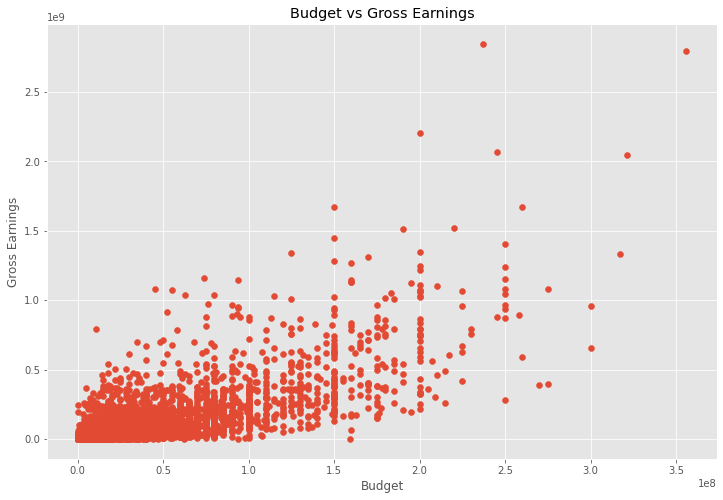

In [23]:
#scatter plot with budget and gross 
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

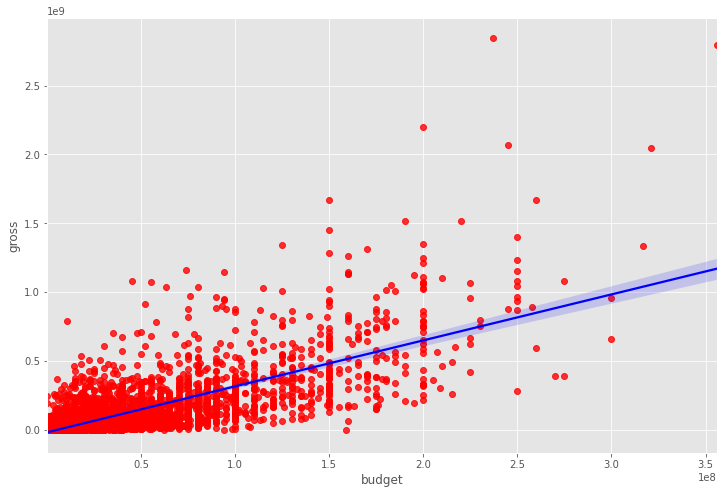

In [24]:
#plot the budget vs gross by using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'}, line_kws={'color':'blue'})

### Correlation

In [25]:
#looking into the correlation
#correalation methods:pearson(default),kendall and spearman
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056418,0.206021,0.327722,0.274321,0.075077
score,0.056418,1.000000,0.474256,0.072009,0.222571,0.414074
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072009,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222571,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414074,0.352303,0.318695,0.275796,1.000000


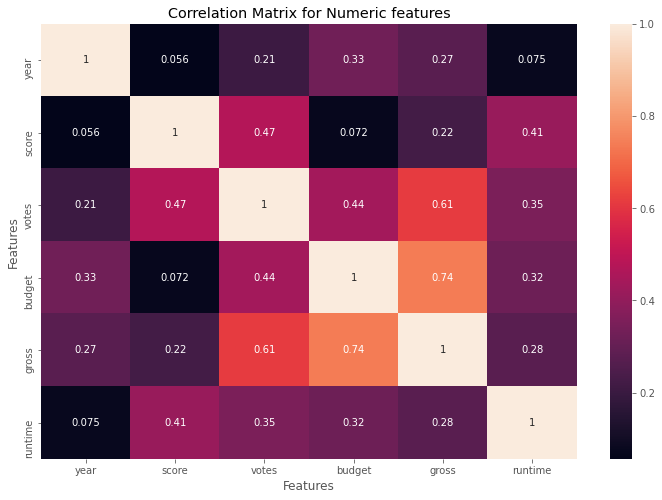

In [26]:
#displaying heatmap for the correlation values for respective movie features
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [27]:
#numerising object type columns in order to draw correlation with numerical type columns 
df_numerised = df
for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.head(40)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.398438,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146
1,3929,6,1,1980,1127,5.800781,65000.0,1578,1158,214,47,4500000.0,58853104.0,452,104
2,3641,4,0,1980,1359,8.703125,1200000.0,757,1818,1157,47,18000000.0,538375040.0,945,124
3,204,4,4,1980,1127,7.699219,221000.0,889,1413,1474,47,3500000.0,83453536.0,1108,88
4,732,6,4,1980,1170,7.300781,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98
5,1509,6,9,1980,1922,6.398438,123000.0,1758,3081,155,47,550000.0,39754600.0,1108,95
6,3930,6,0,1980,1359,7.898438,188000.0,974,576,860,47,27000000.0,115229888.0,1397,133
7,3122,6,3,1980,530,8.203125,330000.0,1269,1257,1469,47,18000000.0,23402428.0,390,129
8,3732,4,0,1980,1346,6.800781,101000.0,1606,1402,595,47,54000000.0,108185704.0,548,127
9,4401,6,3,1980,1755,7.000000,10000.0,2011,280,402,47,10000000.0,15795189.0,1391,100


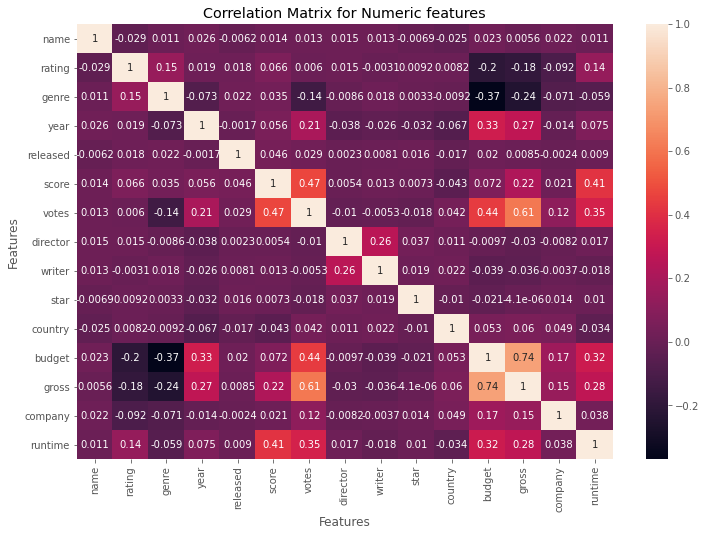

In [28]:
#display the heatmap correlation matrix for all movie features after numerising the movie features
correlation_matrix=df_numerised.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [29]:
#focusing on the correlation values that is above 0.5 
correlation_mat = df_numerised.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

### Findings
### Gross earnings and budget has the highest correlation(r=0.740247) amongst the features
### Gross earnings and votes have a decent correlation(r=0.614751)

### Unexpected Findings
### Expected the company and gross earnings to have a decent orrelation of at least 0.5 but data reveals that it has a weak correlation(r=0.15)